In [36]:
# Load Modules
import warnings
warnings.filterwarnings("ignore")

from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [2]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

In [6]:
#Read data from Excel file
djia_df = pd.read_excel('Data/DJIA_Jan2016_Dec2016.xlsx')

In [7]:
#Rename the second column
djia_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
5,2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
6,2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
7,2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
8,2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000
9,2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000


In [8]:
#Let us parse the Date column and use as row index for the DataFrame and drop it as a column
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)

In [9]:
#Let us see first few rows of the modified DataFrame
djia_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000


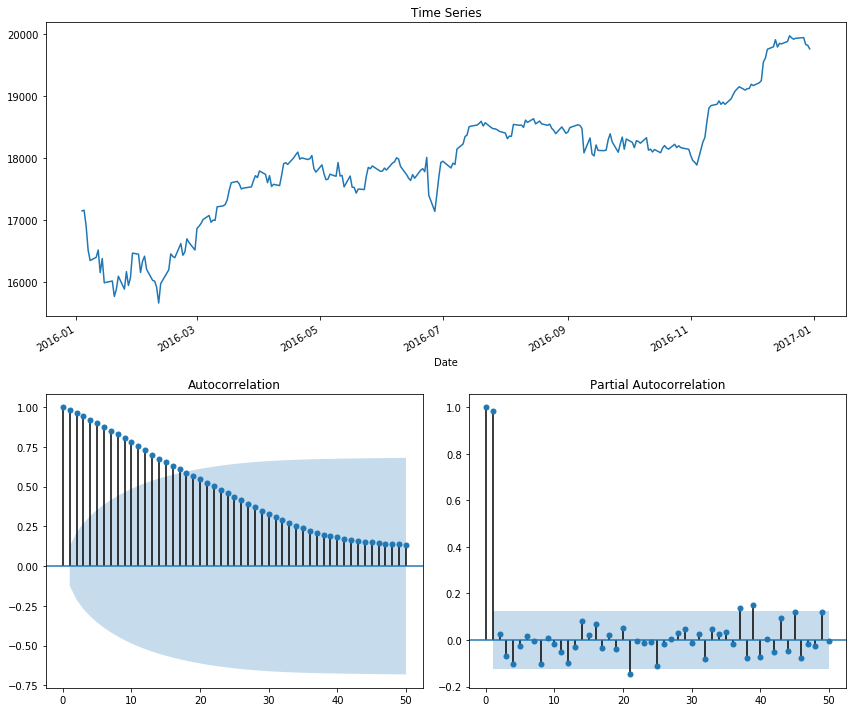

In [10]:
# Plot ACF and PACF
djia_df=djia_df.dropna()
plotds(djia_df['Close'], nlag=50)

In [11]:
# Evaluate mean and variance at mid values
mean1, mean2 =djia_df.iloc[:125].Close.mean(), djia_df.iloc[125:].Close.mean()
var1, var2 = djia_df.iloc[:125].Close.var(), djia_df.iloc[125:].Close.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=17226.579164, mean2=18616.603593
variance1=487045.734003, variance2=325183.639530


In [12]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
adf_result= adfuller(djia_df.Close.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -0.462320
p-value: 0.899162


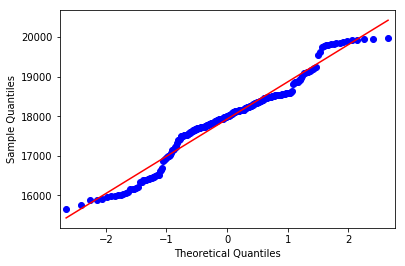

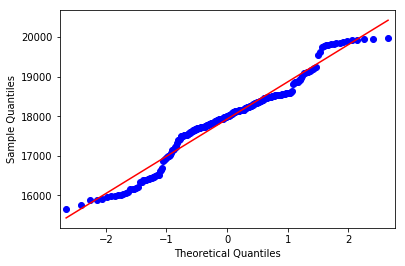

In [13]:
# QQ plot and probability plot
sm.qqplot(djia_df['Close'], line='s')

In [14]:
# Optimize ARMA parameters (Will return a non-stationary error)
arma_obj = smtsa.ARMA(djia_df['Close'].tolist(), order=(1, 1)).fit(maxlag=30, method='mle', trend='nc')

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

Text(0.5,1,'First-order differences of DJIA during Jan 2016-Dec 2016')

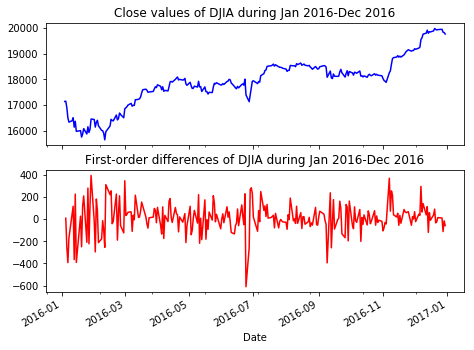

In [15]:
#Let us plot the original time series and first-differences
first_order_diff = djia_df['Close'].diff(1).dropna()
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(7.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')

ADF Statistic: -17.135094
p-value: 0.000000


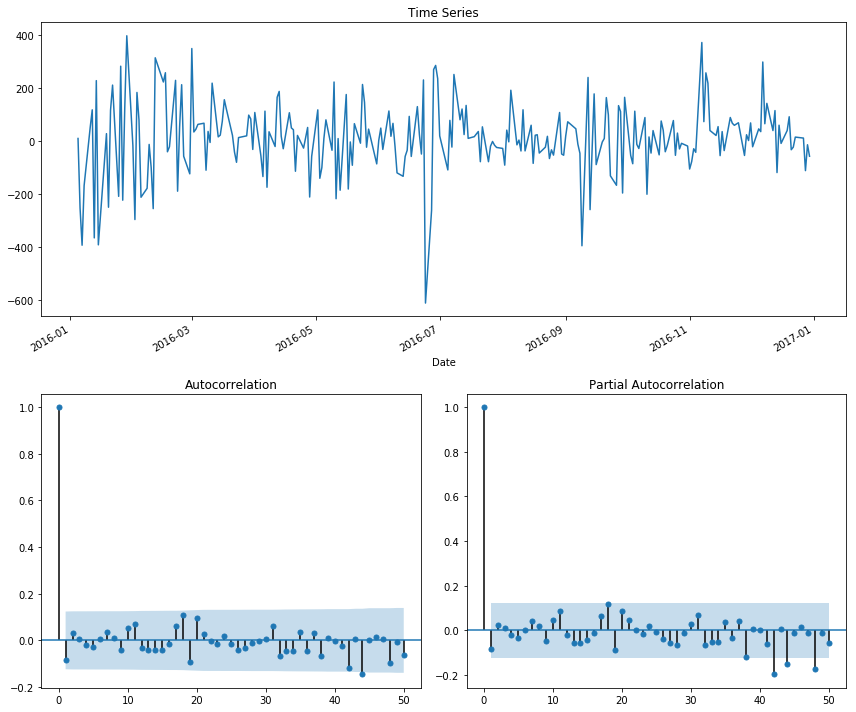

In [16]:
# plot signal
plotds(first_order_diff, nlag=50)
adf_result= adfuller(first_order_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

In [17]:
# Optimize ARMA parameters
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(djia_df['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass

In [22]:
print(aicVal[0][3])

3182.6357271384236


In [19]:
# Optimal ARIMA model
arima_obj = ARIMA(djia_df['Close'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  250
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1585.885
Method:                       css-mle   S.D. of innovations            136.122
Date:                Wed, 14 Aug 2019   AIC                           3177.769
Time:                        15:10:31   BIC                           3188.334
Sample:                             2   HQIC                          3182.021
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1011      0.119      0.853      0.395      -0.131       0.334
ma.L1.D2.y    -1.0000      0.012    -81.004      0.000      -1.024      -0.976
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
# Evaluate prediction
pred=np.append([0,0],arima_obj_fit.fittedvalues.tolist())
djia_df['ARIMA']=pred
diffval=np.append([0,0], arima_obj_fit.resid+arima_obj_fit.fittedvalues)
djia_df['diffval']=diffval

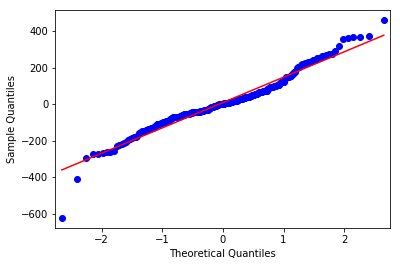

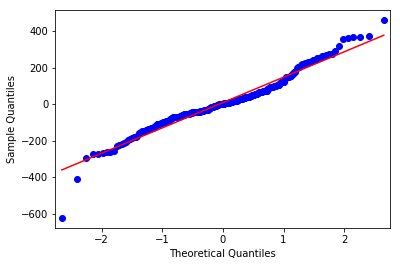

In [25]:
# QQ plot and probability plot
sm.qqplot(arima_obj_fit.resid, line='s')

Text(0,0.5,'Closing')

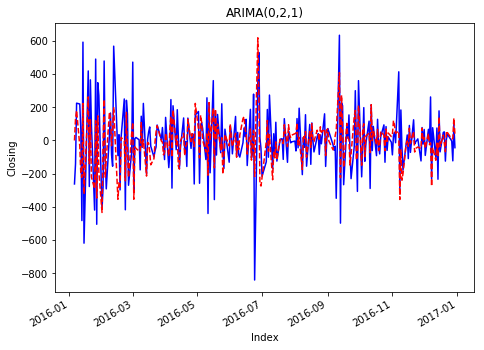

In [26]:
# Plot output
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(7.5, 5.5)
djia_df['diffval'].iloc[2:].plot(color='b', linestyle = '-', ax=axarr)
djia_df['ARIMA'].iloc[2:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(0,2,1)')
plt.xlabel('Index')
plt.ylabel('Closing')

Text(0,0.5,'Forecasted Values')

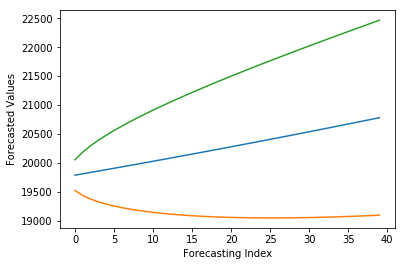

In [34]:
# Forecasting
f, err, ci=arima_obj_fit.forecast(40)
#djia_df['forecast'] = arima_obj_fit.forecast(10) 
plt.plot(f)
plt.plot(ci)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted Values')

In [37]:
# Seasonality (based on first difference ACF shows significance at 42 lag)
x=djia_df['Close']-djia_df['Close'].shift(42)
mod = sm.tsa.statespace.SARIMAX(djia_df['Close'], trend='n', order=(0,2,1), seasonal_order=(1,1,1,42))
sarimax= mod.fit()
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(0, 2, 1)x(1, 1, 1, 42)   Log Likelihood               -1366.570
Date:                            Wed, 14 Aug 2019   AIC                           2741.141
Time:                                    15:26:09   BIC                           2754.491
Sample:                                         0   HQIC                          2746.539
                                            - 252                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     16.164     -0.062      0.951     -32.680      30.680
ar.S.L42      -0.2542      0.093     -2.727      0.006      -0.437      -0.072
ma.S.L42      -0.4671      0.130     -3.597      0.000      -0.722      -0.213
sigma2      2.355e+04    3.8e+05      0.062      0.951   -7.22e+05    7.69e+05
===================================================================================
Ljung-Box (Q):                       31.80   Jarque-Bera (JB):                21.28
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""